# FEATURE MATCHING

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate 

from prettytable import PrettyTable
import shap

## Data Preparation

In [156]:
df = pd.read_csv('extractedDataMinMaxScaled.csv')
df = df.sample(frac = 1).reset_index(drop = True)

In [157]:
df

,fname,labels,ZCR(mean),ZCR(std),RMSE(mean),RMSE(std),tempo,chroma_stft(mean),chroma_stft(std),spectral_centroid(mean),...,mfcc_21(mean),mfcc_21(std),mfcc_22(mean),mfcc_22(std),mfcc_23(mean),mfcc_23(std),mfcc_24(mean),mfcc_24(std),mfcc_25(mean),mfcc_25(std)
0,./Data/genres_original/rock/rock.00045.wav,rock,0.226374,0.134289,0.233634,0.161378,0.529412,0.385130,0.648877,0.256394,...,-8.159641,5.279934,-2.438251,4.596796,-7.740369,5.283381,-11.312052,4.925729,-6.518998,5.756306
1,./Data/genres_original/metal/metal.00057.wav,metal,0.482423,0.214536,0.514284,0.220726,0.400000,0.641775,0.553085,0.555791,...,-6.330816,5.160343,0.617043,6.125128,0.624083,6.582023,1.287028,6.876372,1.518274,6.257923
2,./Data/genres_original/classical/classical.000...,classical,0.346926,0.169682,0.301848,0.373874,0.253333,0.284122,0.630418,0.428041,...,-3.702766,7.619106,-5.138118,7.532632,-6.873308,6.576582,-3.206298,5.396031,-2.818215,4.752520
3,./Data/genres_original/reggae/reggae.00037.wav,reggae,0.164314,0.278915,0.206529,0.306914,0.529412,0.703696,0.688449,0.294767,...,-0.755585,5.647345,-2.018956,5.676899,-3.279230,5.944809,-0.209687,5.916766,-2.028497,6.410248
4,./Data/genres_original/blues/blues.00091.wav,blues,0.056756,0.116086,0.239752,0.205478,0.024390,0.509119,0.794493,0.108951,...,-1.412416,7.488304,-0.372594,7.445759,-2.560911,7.088820,-4.680165,7.614467,-4.397541,6.817622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,./Data/genres_original/rock/rock.00093.wav,rock,0.302940,0.119981,0.255954,0.120864,0.253333,0.348802,0.637845,0.354266,...,-3.249410,6.346182,-7.403814,5.690038,-8.884739,6.098029,-1.380626,6.965482,-4.279216,7.823050
995,./Data/genres_original/hiphop/hiphop.00071.wav,hiphop,0.339276,0.572084,0.615831,0.538773,0.209877,0.471497,0.888041,0.676469,...,-9.021466,6.193431,-2.596141,5.604814,0.081451,5.403853,-7.389799,5.105304,-2.746355,4.435906
996,./Data/genres_original/classical/classical.000...,classical,0.120155,0.076513,0.034559,0.060730,0.481481,0.093301,0.687648,0.056956,...,-1.675345,9.640546,4.871877,9.578560,6.691952,9.274385,3.686732,7.467137,-1.452411,7.608775
997,./Data/genres_original/pop/pop.00007.wav,pop,0.239602,0.259092,0.201375,0.284292,0.400000,0.162295,0.776514,0.361515,...,-6.901660,10.458851,-0.002762,11.126789,8.158956,11.020528,5.126684,12.899942,3.022039,12.083325


In [158]:
df.columns

Index(['fname', 'labels', 'ZCR(mean)', 'ZCR(std)', 'RMSE(mean)', 'RMSE(std)',
       'tempo', 'chroma_stft(mean)', 'chroma_stft(std)',
       'spectral_centroid(mean)', 'spectral_centroid(std)',
       'spectral_bandwith(mean)', 'spectral_bandwith(std)',
       'spectral_rollof(mean)', 'spectral_rollof(std)', 'harm(mean)',
       'harm(std)', 'perc(mean)', 'perc(std)', 'mfcc_1(mean)', 'mfcc_1(std)',
       'mfcc_2(mean)', 'mfcc_2(std)', 'mfcc_3(mean)', 'mfcc_3(std)',
       'mfcc_4(mean)', 'mfcc_4(std)', 'mfcc_5(mean)', 'mfcc_5(std)',
       'mfcc_6(mean)', 'mfcc_6(std)', 'mfcc_7(mean)', 'mfcc_7(std)',
       'mfcc_8(mean)', 'mfcc_8(std)', 'mfcc_9(mean)', 'mfcc_9(std)',
       'mfcc_10(mean)', 'mfcc_10(std)', 'mfcc_11(mean)', 'mfcc_11(std)',
       'mfcc_12(mean)', 'mfcc_12(std)', 'mfcc_13(mean)', 'mfcc_13(std)',
       'mfcc_14(mean)', 'mfcc_14(std)', 'mfcc_15(mean)', 'mfcc_15(std)',
       'mfcc_16(mean)', 'mfcc_16(std)', 'mfcc_17(mean)', 'mfcc_17(std)',
       'mfcc_18(mean)', 'mfcc

## Data Splitting
Train: 75%
Test: 75%

In [159]:
y = df['labels']
X = df.drop(['labels','fname'], axis = 1)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## KNN
### Model Selection

In [240]:
%%time
# cross validation for hyperparameter tuning
hyperparameter_score_list = []
for p in range(1,4):
    for neighbor in range(2,30):
        knn = KNeighborsClassifier(p=p, n_neighbors=neighbor)
        scores = cross_validate(knn, X_train, y_train, cv=10, scoring='f1_macro')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([p, neighbor, mean_score])

CPU times: user 12.2 s, sys: 242 ms, total: 12.5 s
Wall time: 6.84 s


In [264]:
myTable = PrettyTable(["p (distance)", "Number of neighbors", "Avg F1"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+--------------+---------------------+--------+
| p (distance) | Number of neighbors | Avg F1 |
+--------------+---------------------+--------+
|      1       |          2          | 0.565  |
|      1       |          3          | 0.602  |
|      1       |          4          | 0.612  |
|      1       |          5          | 0.612  |
|      1       |          6          |  0.6   |
|      1       |          7          | 0.611  |
|      1       |          8          | 0.609  |
|      1       |          9          | 0.616  |
|      1       |          10         | 0.602  |
|      1       |          11         | 0.597  |
|      1       |          12         | 0.585  |
|      1       |          13         | 0.587  |
|      1       |          14         | 0.579  |
|      1       |          15         |  0.58  |
|      1       |          16         | 0.571  |
|      1       |          17         | 0.572  |
|      1       |          18         | 0.585  |
|      1       |          19         | 0

### Best Parameters for KNN

In [242]:
max_index = 0
max = hyperparameter_score_list[0][2]
for i in range(0, len(hyperparameter_score_list)):
    if hyperparameter_score_list[i][2]> max:
        max_index = i
        max = hyperparameter_score_list[i][2]
    else: 
        continue
print(f"p (distance): {hyperparameter_score_list[max_index][0]}\nnumber of neighbours: {hyperparameter_score_list[max_index][1]}\nf1_macro average: {hyperparameter_score_list[max_index][2]}")

p (distance): 1
number of neighbours: 9
f1_macro average: 0.6155270045497196


## Random Forest
### Model Selection

In [244]:
%%time
hyperparameter_score_list_rf = []
# for min_samples_split in [2, 5, 10]:
for min_samples_leaf in [1, 2, 4]:
    for max_depth in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]:
        for n_estimators in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]:
            rf = RandomForestClassifier(n_estimators=n_estimators, 
                                                max_depth=max_depth, 
                                                # min_samples_split = min_samples_split,
                                                min_samples_leaf = min_samples_leaf,
                                                random_state=42)
            scores = cross_validate(rf, X_train, y_train, cv=10, scoring='f1_macro')
            mean_score = np.mean(scores['test_score'])
            hyperparameter_score_list_rf.append([#min_samples_split, 
                                                     min_samples_leaf, 
                                                     n_estimators, 
                                                     max_depth, 
                                                     mean_score])


CPU times: user 2h 25min 19s, sys: 53.6 s, total: 2h 26min 12s
Wall time: 2h 27min 23s


In [245]:
myTable = PrettyTable(["min_samples_leaf", "n_estimators", "max_depth", "Avg F1 Macro"])
for row in hyperparameter_score_list_rf:
    myTable.add_row([row[0], row[1], row[2], round(row[3],3)])
print(myTable)

+------------------+--------------+-----------+--------------+
| min_samples_leaf | n_estimators | max_depth | Avg F1 Macro |
+------------------+--------------+-----------+--------------+
|        1         |     200      |     10    |    0.678     |
|        1         |     400      |     10    |    0.691     |
|        1         |     600      |     10    |    0.693     |
|        1         |     800      |     10    |    0.695     |
|        1         |     1000     |     10    |    0.692     |
|        1         |     1200     |     10    |     0.69     |
|        1         |     1400     |     10    |    0.694     |
|        1         |     1600     |     10    |    0.691     |
|        1         |     1800     |     10    |    0.689     |
|        1         |     2000     |     10    |    0.686     |
|        1         |     200      |     20    |    0.688     |
|        1         |     400      |     20    |    0.688     |
|        1         |     600      |     20    |    0.69

### Best Parameter for RF

In [246]:
max_index = 0
max = hyperparameter_score_list_rf[0][3]
for i in range(0, len(hyperparameter_score_list)):
    if hyperparameter_score_list_rf[i][3]> max:
        max_index = i
        max = hyperparameter_score_list_rf[i][3]
    else: 
        continue
print(f"min_samples_leaf : {hyperparameter_score_list_rf[max_index][0]}\nn_estimators: {hyperparameter_score_list_rf[max_index][1]}\nmax_depth: {hyperparameter_score_list_rf[max_index][2]}\nf1_macro average: {hyperparameter_score_list_rf[max_index][3]}")

min_samples_leaf : 1
n_estimators: 800
max_depth: 10
f1_macro average: 0.6947529774072714


## Model Evaluation

In [251]:
%%time
model_knn = KNeighborsClassifier(p = 1, n_neighbors = 9)
model_knn.fit(X_train, y_train)

CPU times: user 3.12 ms, sys: 10.7 ms, total: 13.8 ms
Wall time: 44.3 ms


KNeighborsClassifier(n_neighbors=9, p=1)

In [252]:
%%time
model_rf = RandomForestClassifier(min_samples_leaf = 1, n_estimators=800, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

CPU times: user 2.13 s, sys: 27.5 ms, total: 2.16 s
Wall time: 2.18 s


RandomForestClassifier(max_depth=10, n_estimators=800, random_state=42)

In [253]:
%%time
preds_rf = model_rf.predict(X_test)

CPU times: user 47.1 ms, sys: 17.6 ms, total: 64.7 ms
Wall time: 72.3 ms


In [255]:
%%time
preds_knn = model_knn.predict(X_test)


CPU times: user 21.7 ms, sys: 10.5 ms, total: 32.2 ms
Wall time: 39.7 ms


In [256]:
print(f"Tested on Test Data\nF1 Macro(RF): {f1_score(y_test, preds_rf, average = 'macro')}\nF1 Macro(KNN): {f1_score(y_test, preds_knn, average = 'macro')}")

Tested on Test Data
F1 Macro(RF): 0.700388235612284
F1 Macro(KNN): 0.6725828546881522


In [250]:
preds_rf = model_rf.predict(X)
preds_knn = model_knn.predict(X)
print(f"Tested on Overall Data\nF1 Macro(RF): {f1_score(y, preds_rf, average = 'macro')}\nF1 Macro(KNN): {f1_score(y, preds_knn, average = 'macro')}")

Tested on Overall Data
F1 Macro(RF): 0.9256016461183861
F1 Macro(KNN): 0.7014590878954199


In [257]:
cm_rf = confusion_matrix(y_test, preds_rf)
cm_knn = confusion_matrix(y_test, preds_knn)

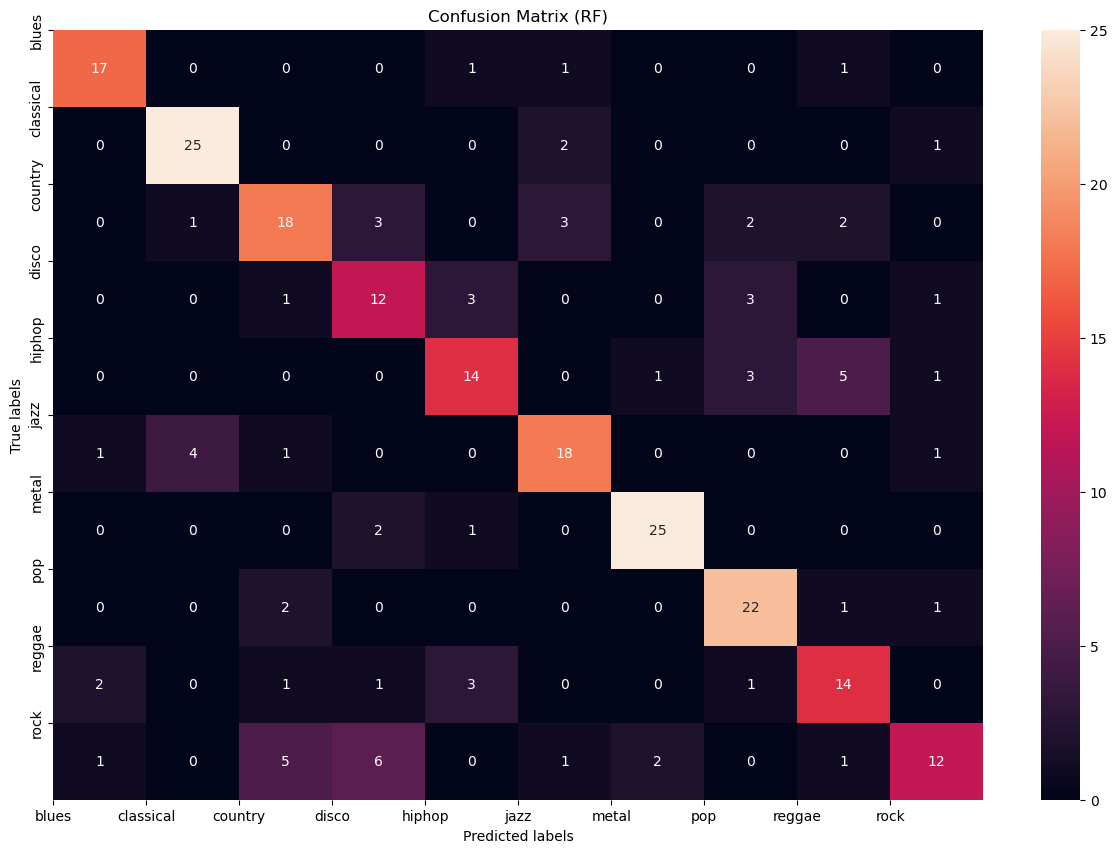

In [258]:
fig, ax= plt.subplots(ncols = 1, nrows = 1, figsize = (15,10))
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (RF)')

labels = np.unique(np.concatenate([y_test.values, preds_rf]))
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

plt.show()

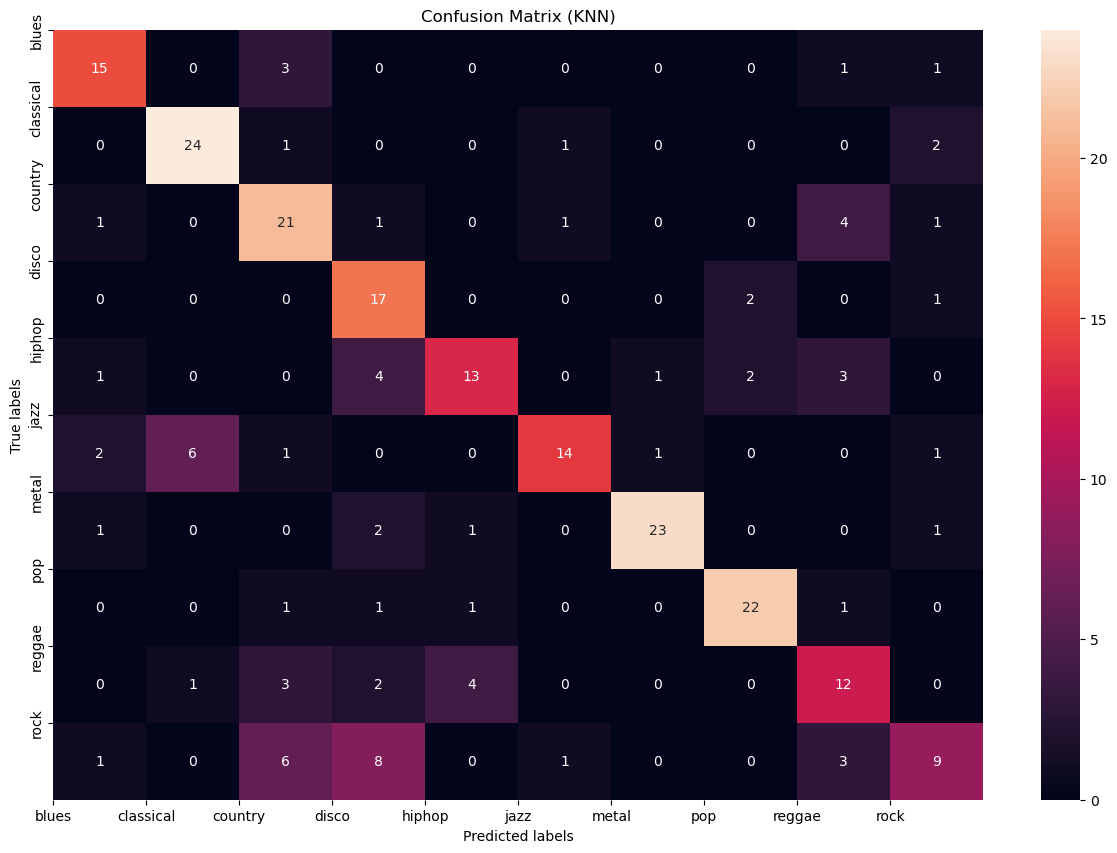

In [259]:
fig, ax= plt.subplots(ncols = 1, nrows = 1, figsize = (15,10))
sns.heatmap(cm_knn, annot=True, ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (KNN)')

labels = np.unique(np.concatenate([y_test.values, preds_knn]))
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

plt.show()

## Post Processing: Feature Importance

In [260]:
explainer = shap.Explainer(model_rf)
shap_values = explainer.shap_values(X_test)

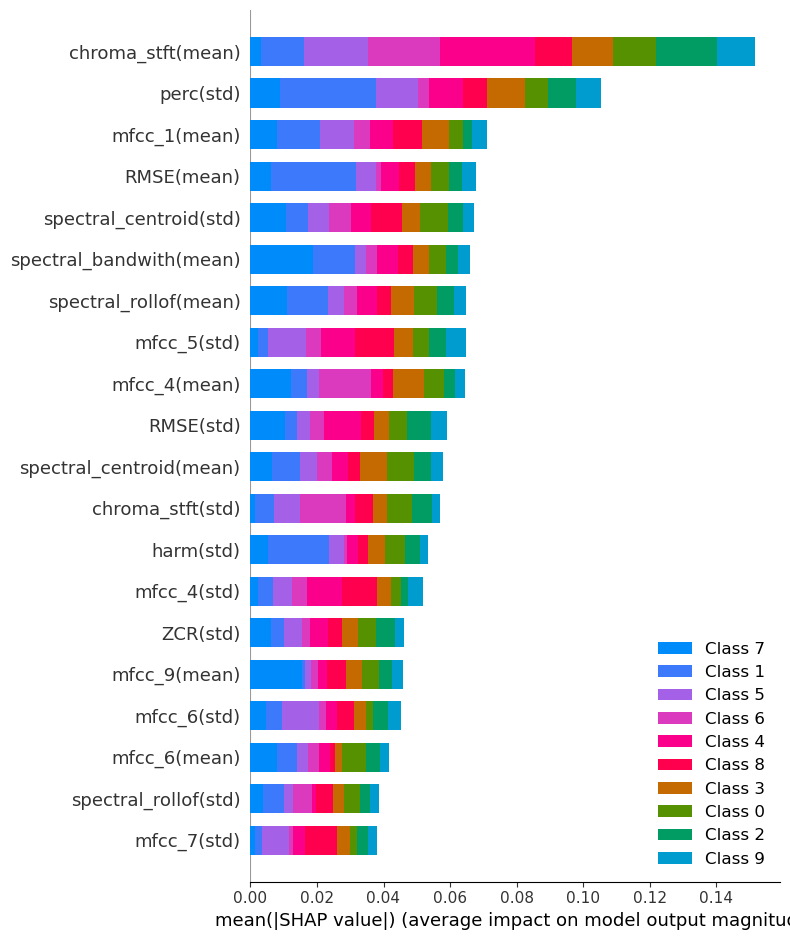

In [261]:
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


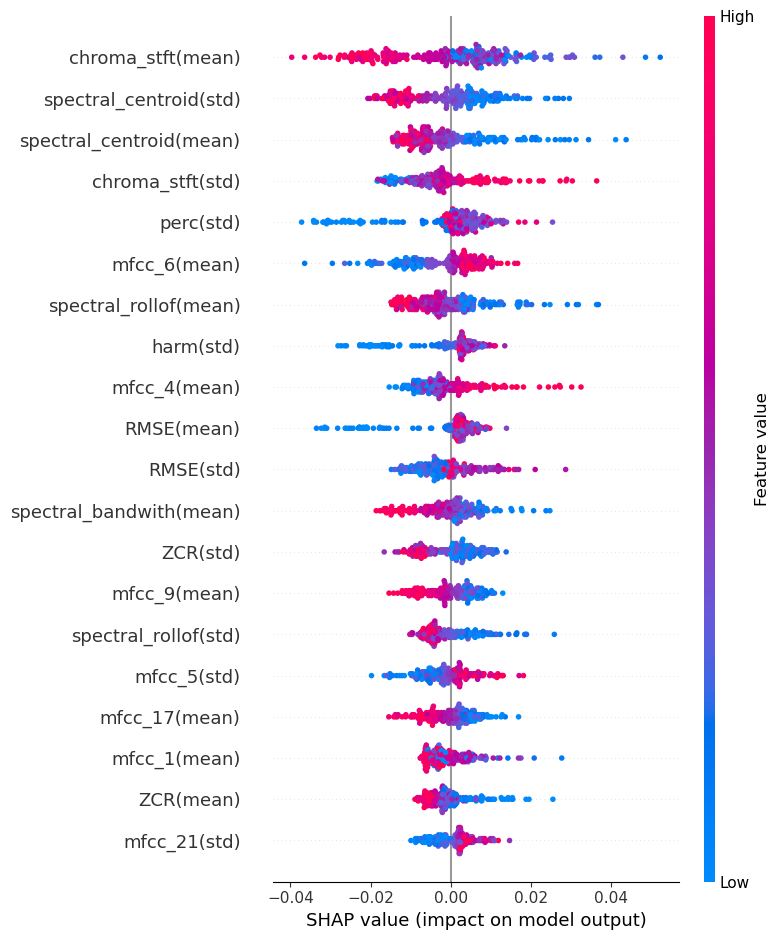

In [262]:
shap.summary_plot(shap_values[0], X_test)

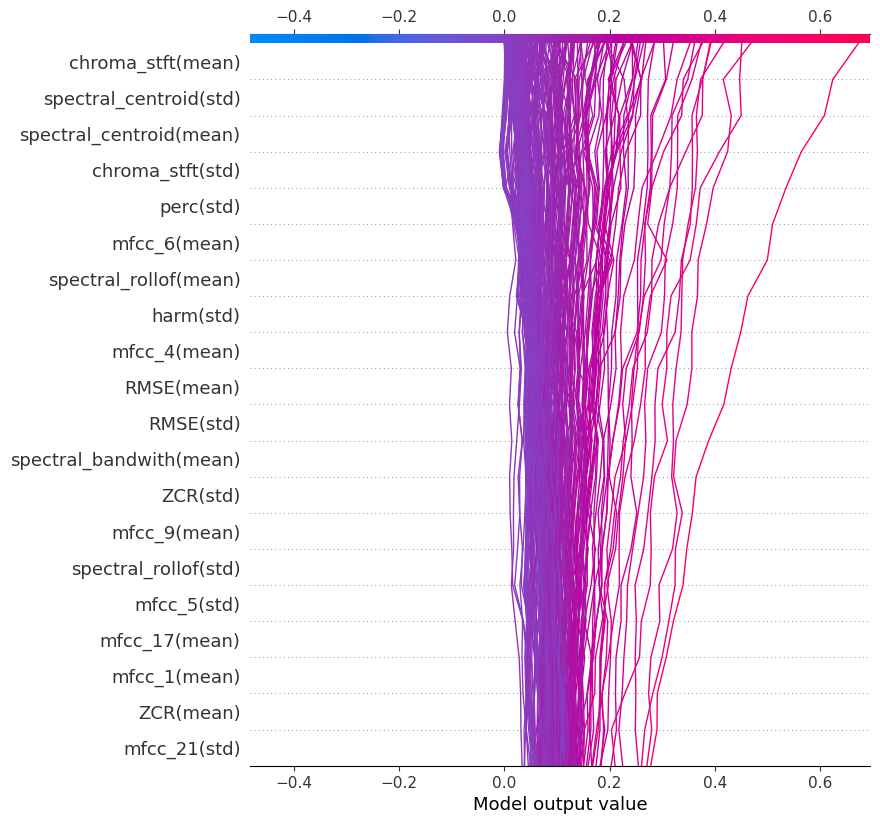

In [263]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)

© Louis 2024